In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dorbicycle_world_foodfeed_production_path = kagglehub.dataset_download('dorbicycle/world-foodfeed-production')

print('Data source import complete.')


# About the dataset

Context
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture. This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

Content
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period.
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.
Dataset's attributes:

Area code - Country name abbreviation
Area - County name
Item - Food item
Element - Food or Feed
Latitude - geographic coordinate that specifies the north–south position of a point on the Earth's surface
Longitude - geographic coordinate that specifies the east-west position of a point on the Earth's surface
Production per year - Amount of food item produced in 1000 tonnes

This is a simple exploratory notebook that heavily expolits pandas and seaborn

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/FAO.csv',  encoding = "ISO-8859-1")
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Let's see what the data looks like...

In [ ]:
df.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Cluster
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,0


In [ ]:
print('Number of different Countries: ' , df['Area'].unique().size)
print('Number of different Items: ' , df['Item'].unique().size)

Number of different Countries:  174
Number of different Items:  115


# Plot for annual produce of different countries with quantity in y-axis and years in x-axis

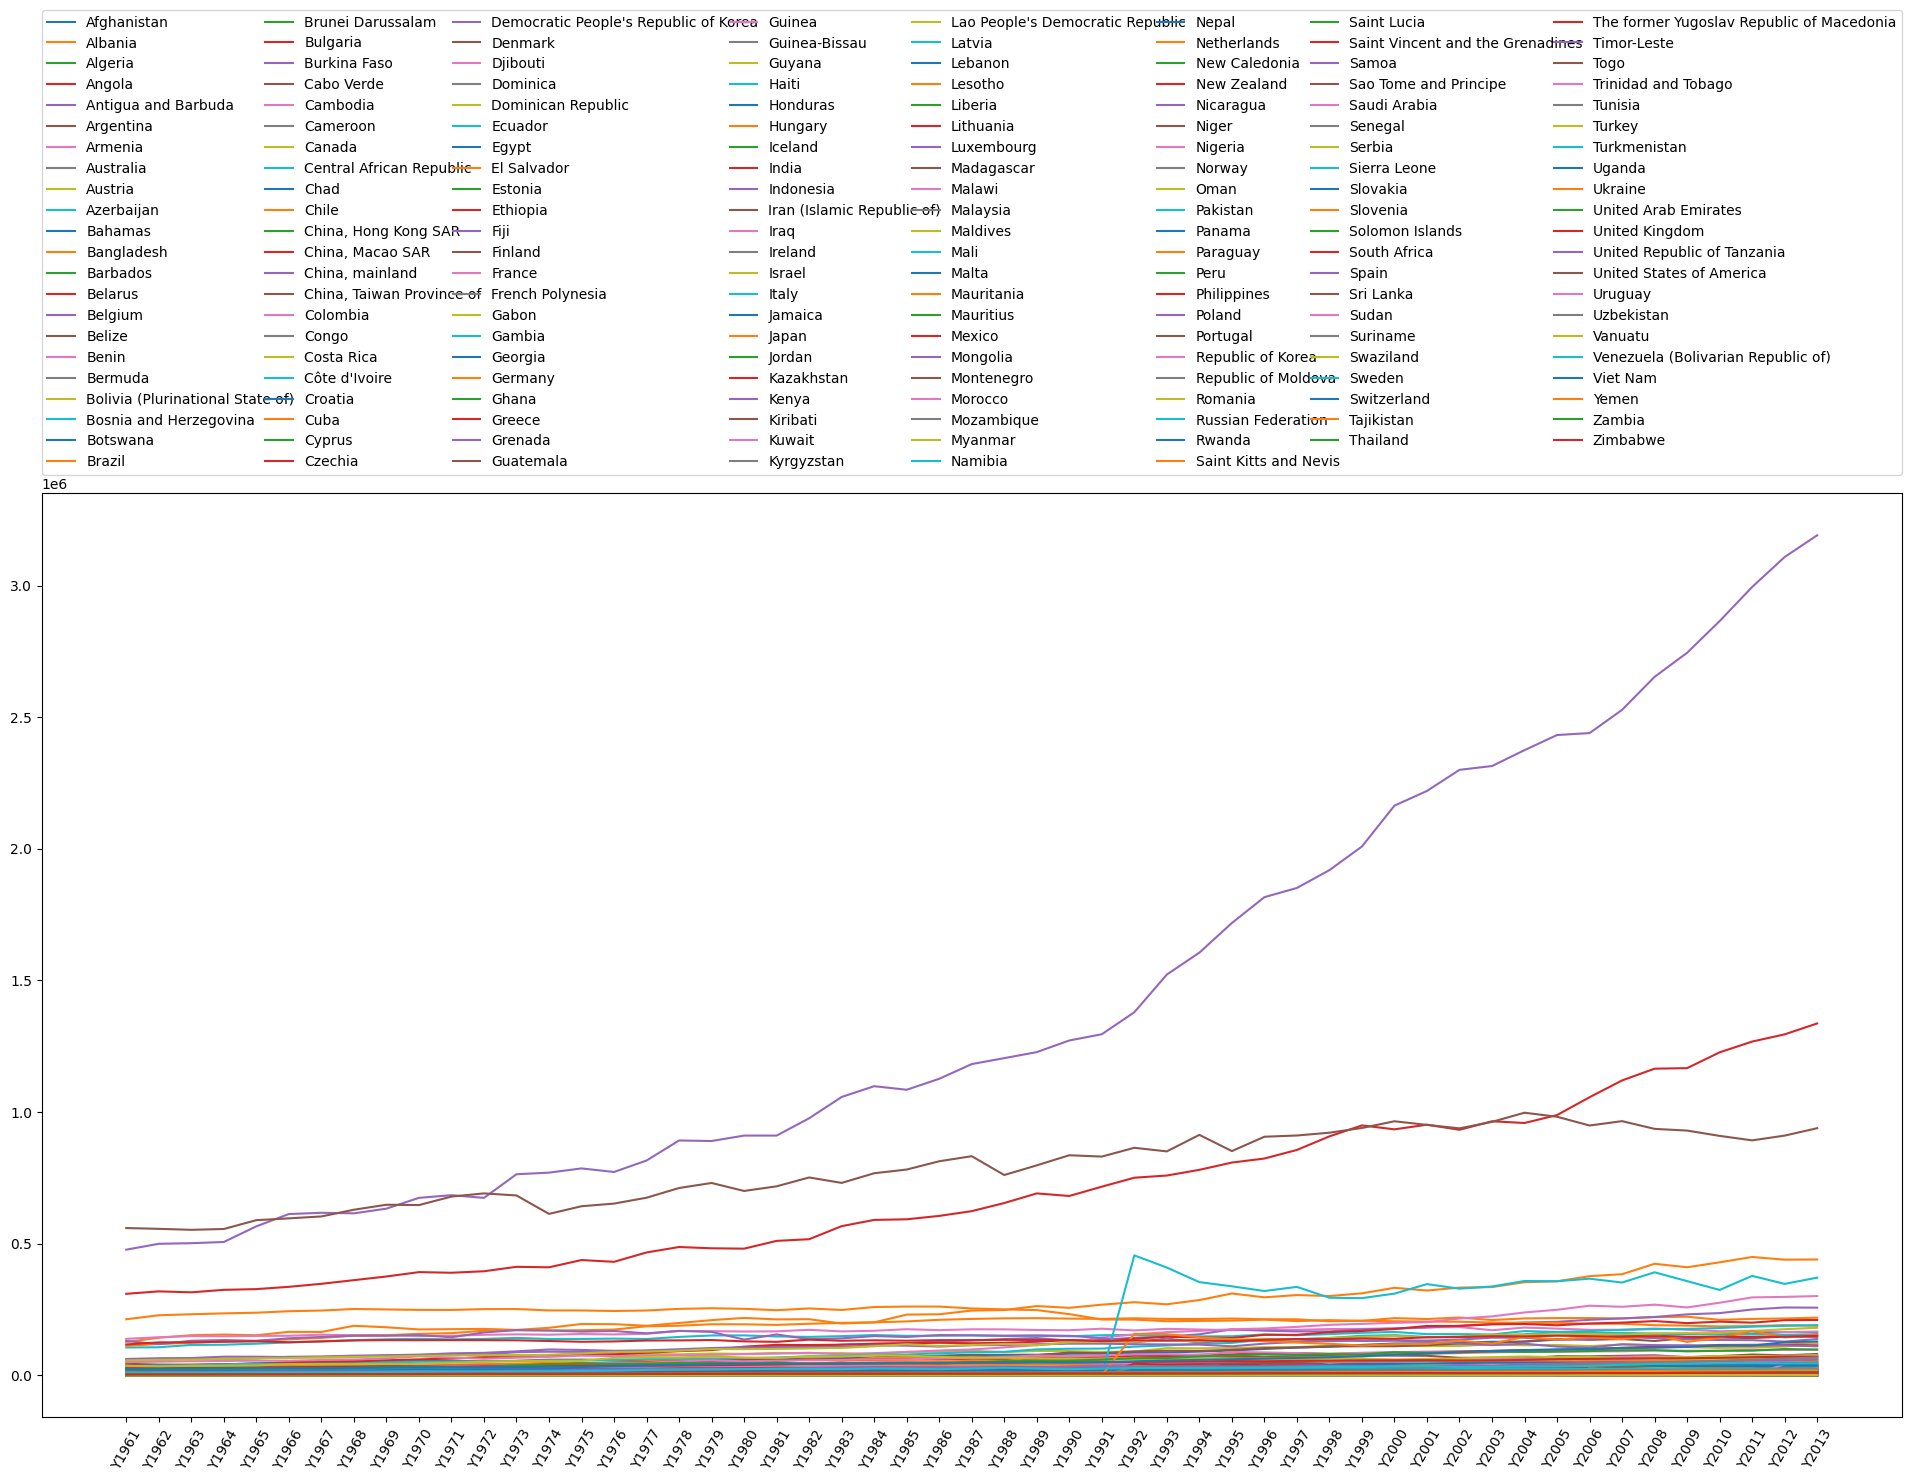

In [ ]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

plt.figure(figsize=(24,12))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area'] == ar].sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

Clearly, China, India and US stand out here. So, these are the countries with most food and feed production.

Now, let's have a close look at their food and feed data

# Food and feed plot for the whole dataset

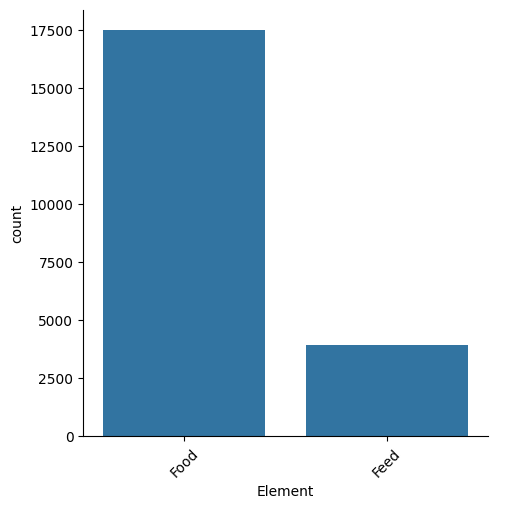

In [ ]:
sns.catplot(x="Element", data=df, kind="count")
plt.xticks(rotation=45)
plt.show()


So, there is a huge difference in food and feed production. Now, we have obvious assumptions about the following plots after looking at this huge difference.

# Food and feed plot for the largest producers(India, USA, China)

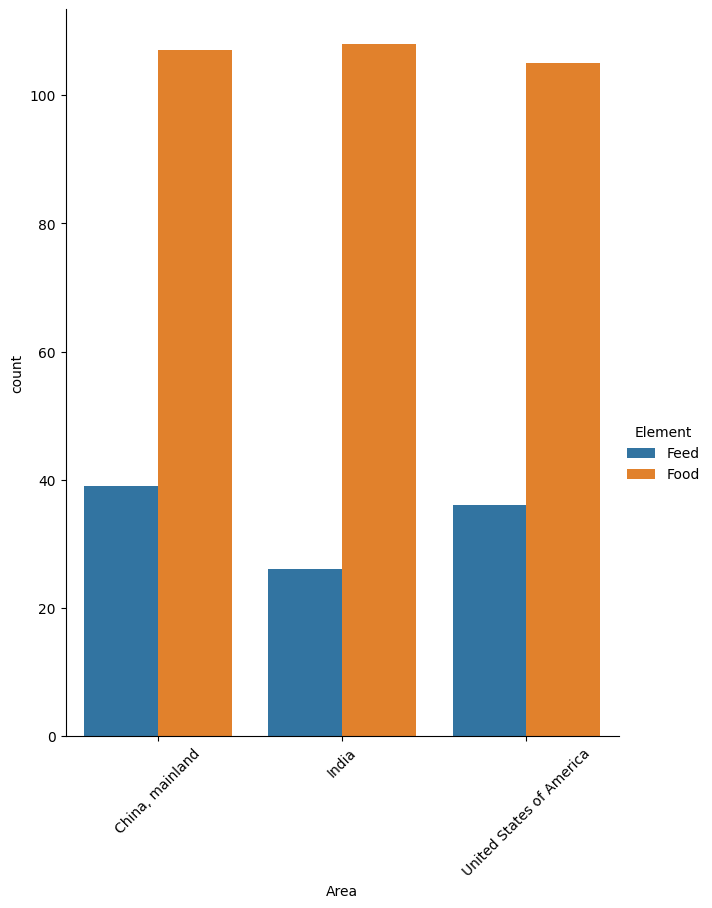

In [ ]:
sns.catplot(
    x="Area",
    data=df[
        (df['Area'] == "India") |
        (df['Area'] == "China, mainland") |
        (df['Area'] == "United States of America")
    ],
    kind="count",
    hue="Element",
    height=8,
    aspect=0.8
)

plt.xticks(rotation=45)
plt.show()


Though, there is a huge difference between feed and food production, these countries' total production and their ranks depend on feed production.

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [ ]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


Now, this is not perfect so we transpose this dataframe and add column names.

In [ ]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0




# First, a new column which indicates mean produce of each state over the given years. Second, a ranking column which ranks countries on the basis of mean produce.

In [ ]:
mean_produce = []
for i in range(174):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head(5)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,12763.616217,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4394.582317,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28345.565451,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13075.710763,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,85.517979,172.0




#MORE DETAILED FEED VS FOOD ANALYSIS

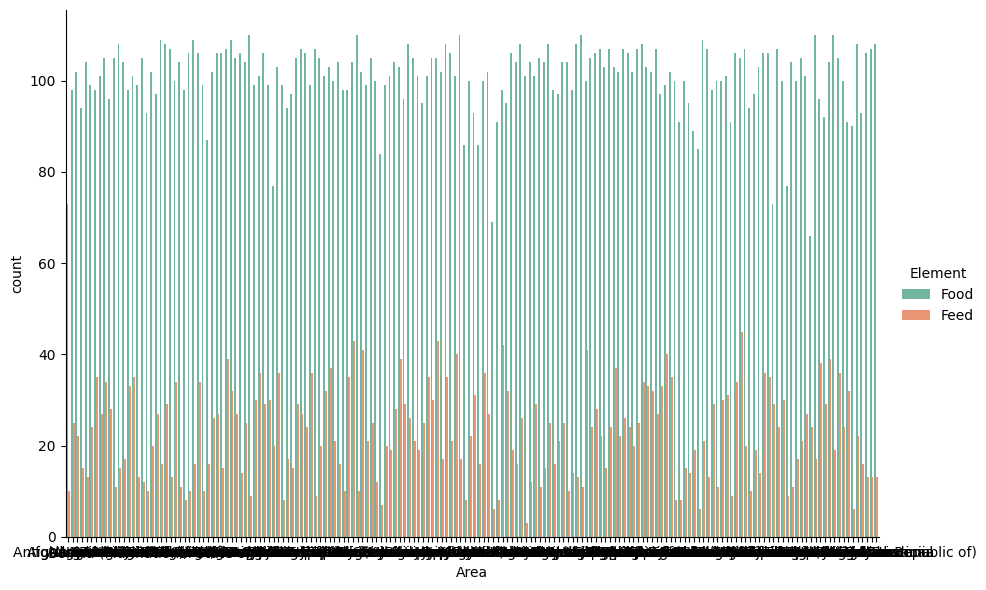

In [ ]:
import seaborn as sns
sns.catplot(
    data=df, x='Area', hue='Element', kind='count',
    height=6, aspect=1.5, palette='Set2', dodge=True,
    col=None, row=None, order=None, hue_order=None, legend=True
)
plt.show()

# Now, we plot a heatmap of correlation of produce in difference years

<Axes: >

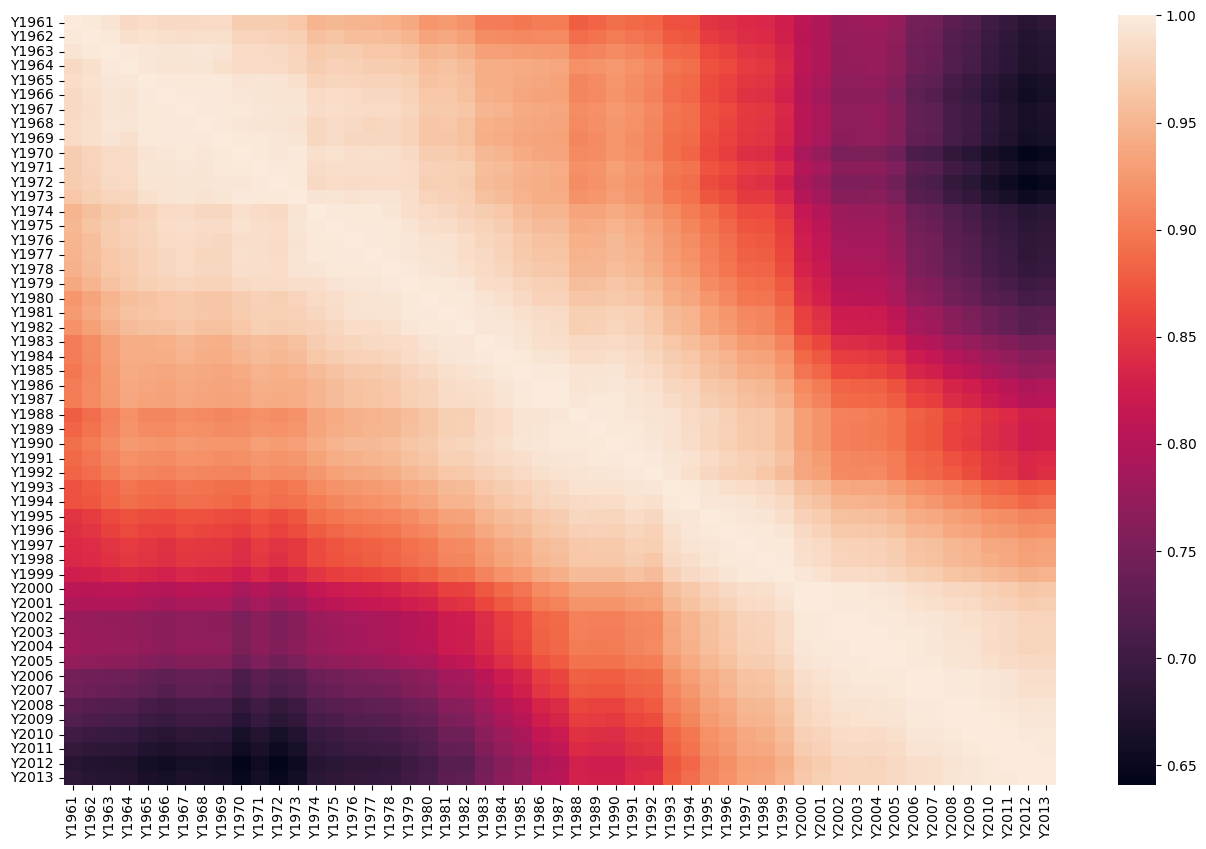

In [ ]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax)

So, we gather that a given year's production is more similar to its immediate previous and immediate following years.

<ipython-input-32-3492892342>:6: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Y1968", y="Y1961", data=df, kind="reg", ax=ax1)
<ipython-input-32-3492892342>:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Y1968", y="Y1963", data=df, kind="reg", ax=ax2)
<ipython-input-32-3492892342>:8: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Y1968", y="Y1986", data=df, kind="reg", ax=ax3)
<ipython-input-32-3492892342>:9: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Y1968", y="Y2013", data=df, kind="reg", ax=ax4)


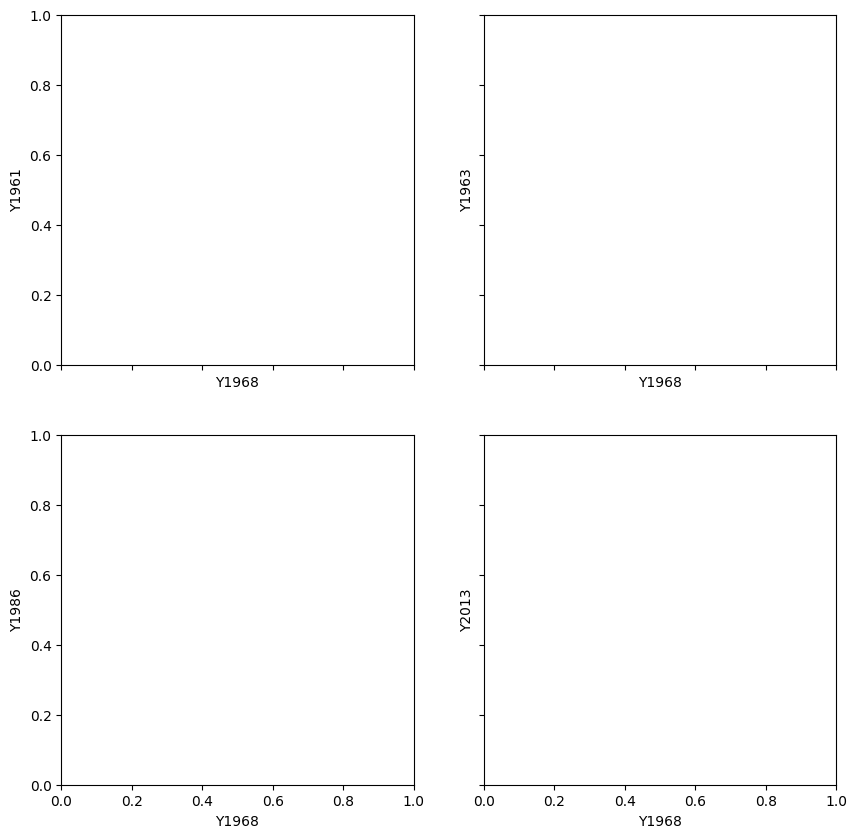

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
ax1.set(xlabel='Y1968', ylabel='Y1961')
ax2.set(xlabel='Y1968', ylabel='Y1963')
ax3.set(xlabel='Y1968', ylabel='Y1986')
ax4.set(xlabel='Y1968', ylabel='Y2013')
sns.jointplot(x="Y1968", y="Y1961", data=df, kind="reg", ax=ax1)
sns.jointplot(x="Y1968", y="Y1963", data=df, kind="reg", ax=ax2)
sns.jointplot(x="Y1968", y="Y1986", data=df, kind="reg", ax=ax3)
sns.jointplot(x="Y1968", y="Y2013", data=df, kind="reg", ax=ax4)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

# Heatmap of production of food items over years

This will detect the items whose production has drastically increased over the years

In [ ]:
feature_df = feature_df.fillna(feature_df.mean(numeric_only=True))


In [ ]:
feature_df.isnull().sum().sum()  # Should return 0


np.int64(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_df)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters back to the original df
df = df.loc[feature_df.index]  # match row indices
df['Cluster'] = clusters


# Add the cluster labels to your original DataFrame
df['Cluster'] = clusters
print(df[['Cluster']].head())



   Cluster
0        0
1        0
2        0
3        0
4        0


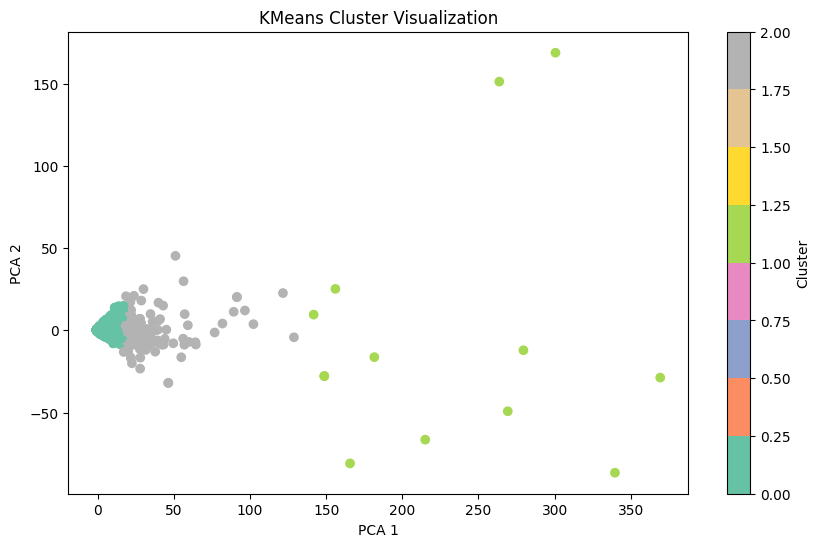

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(10,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='Set2')
plt.title("KMeans Cluster Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


INTSALLING JOBLIB

In [ ]:
!pip install joblib


In [ ]:
from sklearn.cluster import KMeans
import joblib

# Example: training KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Save the model to a file
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [ ]:
# Load the saved model
loaded_kmeans = joblib.load('kmeans_model.pkl')

# Use it to predict
clusters = loaded_kmeans.predict(scaled_data)


In [ ]:
from google.colab import files
files.download('kmeans_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>